In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Initial dataSet'
train = pd.read_csv(r'C:\Users\user\Documents\dataset\raw_data.csv')
train.shape

(1168, 81)

In [3]:
train_data = pd.read_csv(r'C:\Users\user\Documents\dataset\raw_data.csv')
train_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000


In [4]:
train_data = pd.DataFrame(train_data)

In [5]:
print(f'initial shape: {train_data.shape}')

initial shape: (1168, 81)


In [6]:
train_data.T.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167
Id,893,1106,414,523,1037,615,219,1161,650,888,...,497,1259,1223,1205,518,1070,477,158,17,1073
MSSubClass,20,60,30,50,20,180,50,160,180,50,...,20,80,50,20,60,45,20,60,20,50
MSZoning,RL,RL,RM,RM,RL,RM,RL,RL,RM,RL,...,RL,RL,RL,RL,RL,RL,RL,RL,RL,RL


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    964 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,720.240582,420.237685,1.0,355.75,716.5,1080.25,1460.0
MSSubClass,1168.0,56.699486,41.814065,20.0,20.00,50.0,70.00,190.0
LotFrontage,964.0,70.271784,25.019386,21.0,59.00,69.5,80.00,313.0
LotArea,1168.0,10597.720890,10684.958323,1477.0,7560.00,9463.0,11601.50,215245.0
OverallQual,1168.0,6.095034,1.403402,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.594178,1.116842,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1971.120719,30.279560,1872.0,1954.00,1972.0,2000.00,2009.0
YearRemodAdd,1168.0,1985.200342,20.498566,1950.0,1968.00,1994.0,2004.00,2010.0
MasVnrArea,1160.0,104.620690,183.996031,0.0,0.00,0.0,166.25,1600.0
BsmtFinSF1,1168.0,444.345890,466.278751,0.0,0.00,384.0,706.50,5644.0


In [9]:
train_data.drop(columns=['Id'],inplace=True)

In [10]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
4,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


In [11]:
train_data_miss = train_data.isna().sum().sort_values(ascending=False)


In [12]:
train_data_miss = train_data_miss[train_data_miss!=0]
train_data_miss

PoolQC          1164
MiscFeature     1129
Alley           1098
Fence            951
FireplaceQu      551
LotFrontage      204
GarageYrBlt       69
GarageCond        69
GarageType        69
GarageFinish      69
GarageQual        69
BsmtExposure      31
BsmtFinType2      31
BsmtCond          30
BsmtQual          30
BsmtFinType1      30
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [13]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
4,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,45,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,135000
1164,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,208900
1165,60,RL,92.0,12003,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,New,Partial,269500
1166,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000


In [14]:
train_data.drop(columns = ['PoolQC','MiscFeature','Alley','Fence'],inplace=True)

In [15]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [16]:
train_data['FireplaceQu'].value_counts()

Gd    306
TA    251
Fa     26
Ex     19
Po     15
Name: FireplaceQu, dtype: int64

In [17]:
cat_cols = train_data.select_dtypes(include = ['object']).columns.to_list()
num_cols = train_data.select_dtypes(include = np.number).columns.to_list()
print("Catogorical")
print(cat_cols)
print("Numerical")
print(num_cols)

Catogorical
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [18]:
train_data['FireplaceQu'].fillna(0,inplace=True)

train_data['FireplaceQu'].replace({'Po': 1, 'Fa': 2,'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)



<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

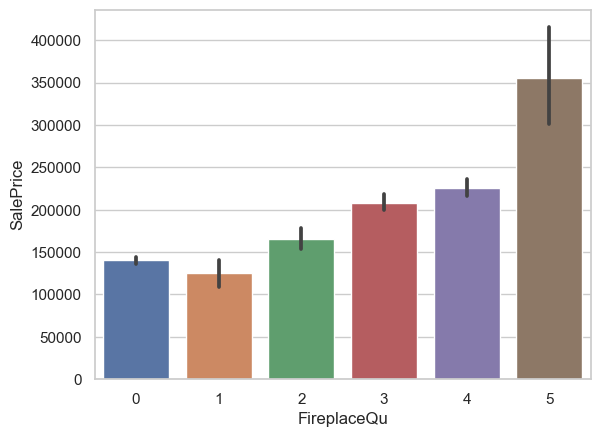

In [19]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu',y='SalePrice',data=train_data)



In [20]:
train_missing_value = train_data.isna().sum()
train_missing_value = train_missing_value[train_missing_value!=0]
train_missing_value.sort_values(ascending= False)
train_missing_value

LotFrontage     204
MasVnrType        8
MasVnrArea        8
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
Electrical        1
GarageType       69
GarageYrBlt      69
GarageFinish     69
GarageQual       69
GarageCond       69
dtype: int64

In [21]:
train_missing_value = train_data.isna().sum()
train_missing_value = train_missing_value[train_missing_value!=0]
 

In [22]:
c= list(train_missing_value.index)
c.append('SalesPrice')


In [23]:
train_data.drop(columns=['LotFrontage', 'GarageYrBlt',
 'MasVnrArea'], inplace=True)

In [24]:
train_missing_value = train_data.isna().sum()
train_missing_value = train_missing_value[train_missing_value!=0]
train_missing_value.sort_values(ascending= False)
print(f'columns having misssing values:{len(train_missing_value)}')


columns having misssing values:11


In [25]:
train_data[['GarageType', 'GarageFinish', 'BsmtFinType2','BsmtExposure', 'BsmtFinType1']]


,GarageType,GarageFinish,BsmtFinType2,BsmtExposure,BsmtFinType1
0,Attchd,RFn,Unf,No,GLQ
1,Attchd,RFn,Unf,Av,GLQ
2,Detchd,Unf,Unf,No,Unf
3,Detchd,Unf,Unf,No,ALQ
4,Attchd,Fin,Unf,Gd,GLQ
...,...,...,...,...,...
1163,Detchd,Unf,Unf,No,ALQ
1164,Attchd,Fin,Unf,Gd,GLQ
1165,BuiltIn,Fin,Unf,No,Unf
1166,Attchd,Fin,Unf,No,ALQ


In [26]:
train_data._get_numeric_data().columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    train_data[c].fillna('NA', inplace = True)
    
#fill None in place of NAN
train_data['MasVnrType'].fillna('None',inplace=True)

In [28]:
train_missing_value = train_data.isna().sum()
train_missing_value = train_missing_value[train_missing_value!=0]
print(f'No of columns having misssing values: {len(train_missing_value)}')
train_missing_value.sort_values(ascending= False)


No of columns having misssing values: 5


GarageQual    69
GarageCond    69
BsmtQual      30
BsmtCond      30
Electrical     1
dtype: int64

In [29]:
#The below cols are taken becuase it has same values like Ex Excellent
# Gd Good
# TA Average/Typical
# Fa Fair
# Po Poor
# NA No Garage

In [30]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

for col in ord_cols:
    train_data[col].fillna(0,inplace=True)
    train_data[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,'Ex': 5}, inplace=True)



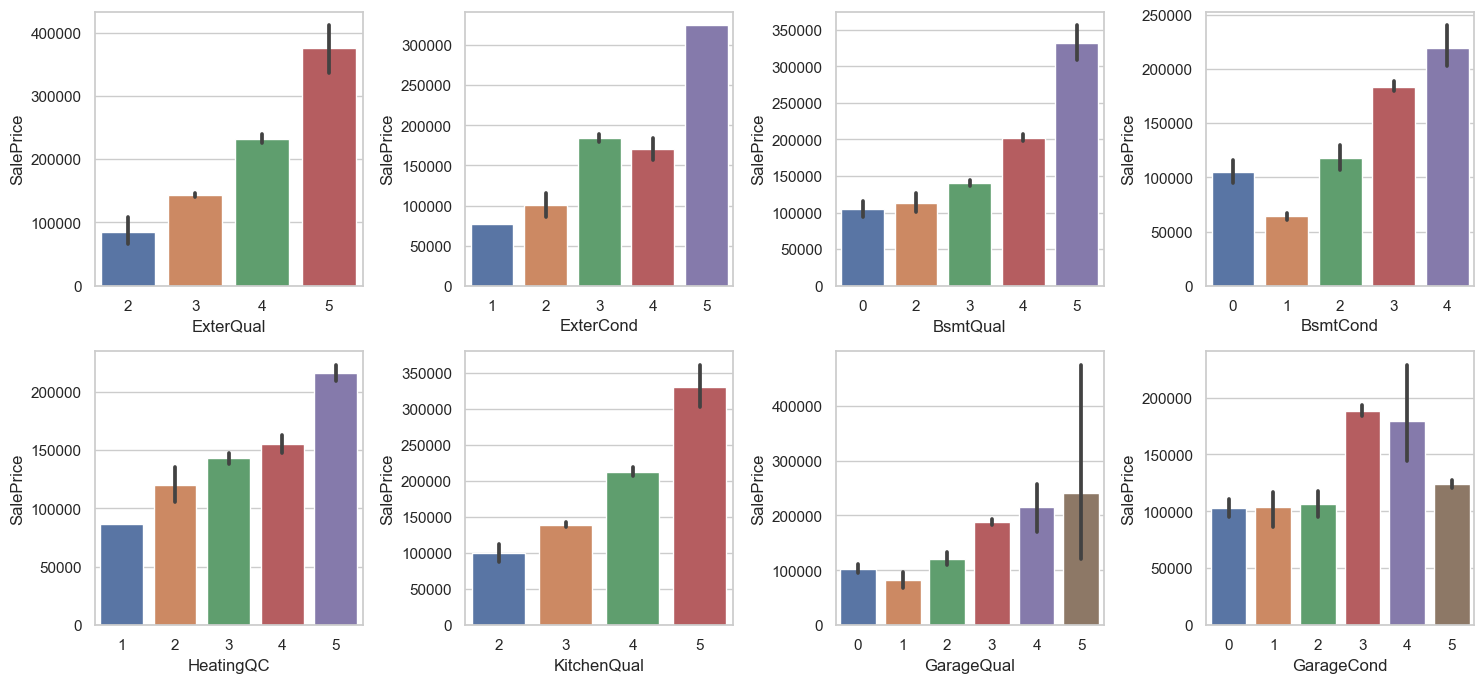

In [31]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

f, axes = plt.subplots(2,4, figsize =(15,7))

for i, ax in enumerate(axes.flatten()):
    sns.barplot(x = ord_cols[i], y= "SalePrice", data = train_data, ax= ax)

plt.tight_layout()        
plt.show()


In [32]:
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
value_counts = {}
for col in nom_cols:
    value_counts[col] = len(train_data[col].value_counts())

print(f'Nominal columns: {len(nom_cols)}')

Nominal columns: 30


In [33]:
values = {key:value for key, value in sorted(value_counts.items())}
#print(f'{key}: {value}')
values

{'BldgType': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'CentralAir': 2,
 'Condition1': 9,
 'Condition2': 8,
 'Electrical': 5,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Foundation': 6,
 'Functional': 7,
 'GarageFinish': 4,
 'GarageType': 7,
 'Heating': 5,
 'HouseStyle': 8,
 'LandContour': 4,
 'LandSlope': 3,
 'LotConfig': 5,
 'LotShape': 4,
 'MSZoning': 5,
 'MasVnrType': 4,
 'Neighborhood': 25,
 'PavedDrive': 3,
 'RoofMatl': 7,
 'RoofStyle': 6,
 'SaleCondition': 6,
 'SaleType': 9,
 'Street': 2,
 'Utilities': 2}

In [34]:
nominal_values_lessthan_6 = []

for i in nom_cols:
    nvalues = len(train_data[i].value_counts())
    if nvalues < 7:
        nominal_values_lessthan_6.append(i)
        
print(f'Nominal cols with less than 6 different values:{len(nominal_values_lessthan_6)}')


Nominal cols with less than 6 different values:18


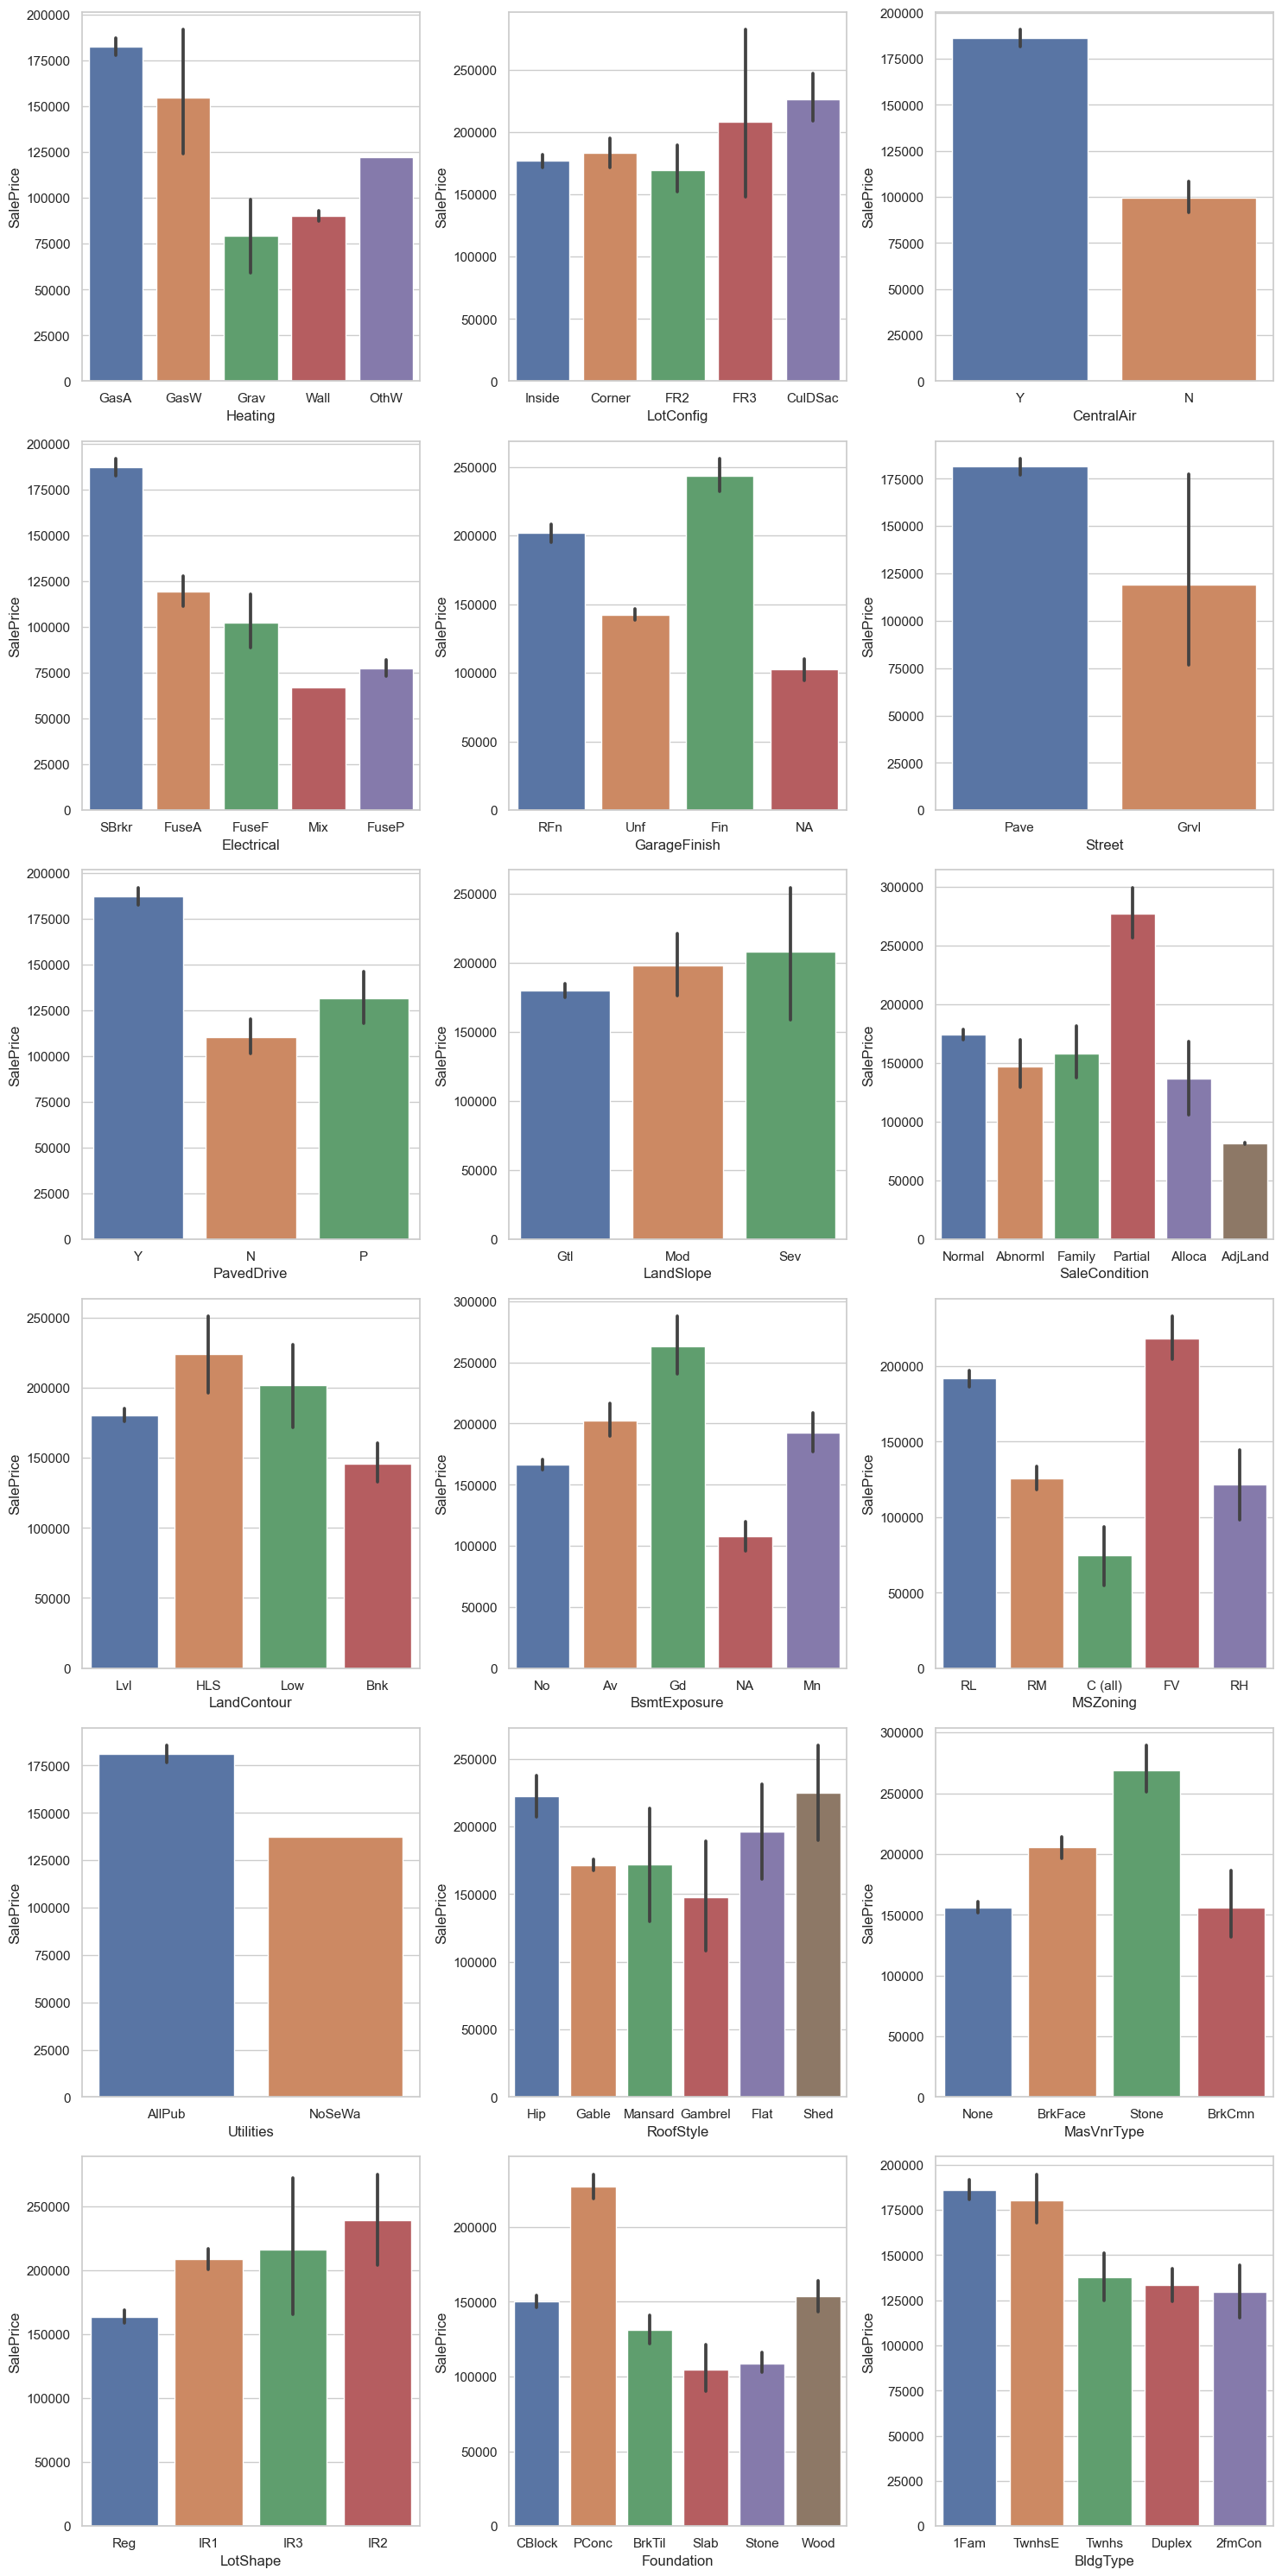

In [35]:
f, axes = plt.subplots(6,3, figsize =(15,30))

for i, ax in enumerate(axes.flatten()):
    sns.barplot(x = nominal_values_lessthan_6[i], y= "SalePrice", data = train_data, ax= ax)

plt.tight_layout()        
plt.show()


In [36]:
#train_data['Electrical'].fillna('nullva',inplace=True)

In [37]:
nominal_values_lessthan_6 = {}

for i in nom_cols:
    nanvalues = len(train_data[i].value_counts())
    if nvalues < 7:
        nominal_values_lessthan_6 = i
    
print(f'Nominal cols with less than 6 different values:{nominal_values_lessthan_6}')


Nominal cols with less than 6 different values:BldgType


In [38]:
#checking the total sum of values for each column

c={}
values_total = {}
for i in nom_cols:
    c[i] = train_data[i].value_counts()
    
    values_total[i] = pd.Series(c[i]).sum()

In [39]:
values_total

{'Heating': 1168,
 'Exterior2nd': 1168,
 'LotConfig': 1168,
 'HouseStyle': 1168,
 'CentralAir': 1168,
 'Condition1': 1168,
 'Electrical': 1167,
 'GarageFinish': 1168,
 'Street': 1168,
 'PavedDrive': 1168,
 'LandSlope': 1168,
 'SaleType': 1168,
 'SaleCondition': 1168,
 'Exterior1st': 1168,
 'LandContour': 1168,
 'Neighborhood': 1168,
 'BsmtExposure': 1168,
 'MSZoning': 1168,
 'Utilities': 1168,
 'BsmtFinType1': 1168,
 'RoofStyle': 1168,
 'MasVnrType': 1168,
 'LotShape': 1168,
 'Foundation': 1168,
 'GarageType': 1168,
 'Functional': 1168,
 'BsmtFinType2': 1168,
 'Condition2': 1168,
 'RoofMatl': 1168,
 'BldgType': 1168}

In [40]:
#filling SBrkr where there was 1 NAN VALUE

train_data['Electrical'].fillna('SBrkr',inplace = True)


In [41]:
#Checking zeroes
train_data.isin([0]).sum().sort_values(ascending=False)

PoolArea        1164
LowQualFinSF    1148
3SsnPorch       1148
MiscVal         1131
BsmtHalfBath    1097
                ... 
BsmtFinType2       0
Heating            0
MSZoning           0
CentralAir         0
SalePrice          0
Length: 73, dtype: int64

In [42]:
number_columns = train_data.select_dtypes(include=np.number).columns
print(len(number_columns))

43


In [43]:
print(f'shape now: {train_data.shape}')

shape now: (1168, 73)


Cleaning script

In [44]:
def cleaningScript(df):
    
    cols = ['PoolQC','MiscFeature','Alley','Fence']
    df.drop(columns=cols,inplace=True)
    
    df.drop(columns=['LotFrontage', 'GarageYrBlt','MasVnrArea'], inplace=True)
    
    ord_cols_to_nom = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

    for col in ord_cols_to_nom:
        df[col].fillna(0,inplace=True)
        df[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,'Ex': 5}, inplace=True)    
    
    na_values = ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']
    for v in na_values:
        df[v].fillna('NA', inplace = True)
    
    #fill None in place of NAN
    df['MasVnrType'].fillna('None',inplace=True)
    
    df['Electrical'].fillna('SBrkr',inplace = True)

    df.to_csv(r'C:\Users\user\Downloads\cleaned_file.csv')
    return df

if __name__ == "__main__":

    file = os.path.join(r'C:\Users\user\Documents\dataset\raw_data.csv')
    
    if os.path.exists(file):
        data = pd.read_csv(file)
        print('Before cleaning:', data.shape)
        clean = cleaningScript(data)
        print('After cleaning:', clean.shape)
        #clean.to_csv(r'C:\Users\user\Downloads\cleaned_file.csv')
    else:
        print('file not found')
    

Before cleaning: (1168, 81)
After cleaning: (1168, 74)


# LinearRegression

In [45]:
#!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pickle


In [46]:
def building_test_data(houseData):
    # load and split the data
    trainData = houseData.sample(frac=0.8, random_state = 30).reset_index(drop=True)

    testData = houseData.drop(trainData.index).reset_index(drop=True)

    # save data
    trainData.to_csv('train.csv', index=False)
    testData.to_csv('test.csv', index=False)
    print(f"Index:{trainData.index}")
    print(f"Train data for modeling: {trainData.shape}")
    print(f"Test data for predictions: {testData.shape}")
    
def train_model(x_train, y_train):

    print("Training the model....")

    model = Pipeline(steps=[("label encoding", OneHotEncoder(handle_unknown='ignore')),("tree model", LinearRegression())])
    model.fit(x_train, y_train)

    return model
  
def accuracy(model, x_test, y_test):
    print("Testing the model....")
    predictions = model.predict(x_test)
    tree_mse = mean_squared_error(y_test, predictions)
    tree_rmse = np.sqrt(tree_mse)
    return tree_rmse

def export_model(model):
    # Save the model
    pkl_path = 'model.pkl'
    with open(pkl_path, 'wb') as file:
        pickle.dump(model, file)
        print(f"Model saved at {pkl_path}")
    

In [47]:
def main():
    # Load the whole data
    data = pd.read_csv(r'C:\Users\user\Downloads\cleaned_file.csv', keep_default_na=False, index_col=0)

    # Split train/test
    # Creates train.csv and test.csv
    building_test_data(data)

    # Loads the data for the model training
    train = pd.read_csv('train.csv', keep_default_na=False)
    x_train = train.drop(columns=['SalePrice'])
    y_train = train['SalePrice']

    # Loads the data for the model testing
    test = pd.read_csv('test.csv', keep_default_na=False)
    x_test = test.drop(columns=['SalePrice'])
    y_test = test['SalePrice']

    # Train and Test
    model = train_model(x_train, y_train)
    rmse_test = accuracy(model, x_test, y_test)

    print(f"Average Price Test: {y_test.mean()}")
    print(f"RMSE: {rmse_test}")

    # Save the model
    export_model(model)

if __name__ == '__main__':
    main()

Index:RangeIndex(start=0, stop=934, step=1)
Train data for modeling: (934, 74)
Test data for predictions: (234, 74)
Training the model....
Testing the model....
Average Price Test: 175652.0128205128
RMSE: 10552.302337453877
Model saved at model.pkl
